In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot  as plt

Load Dataset in

In [2]:
col_names = ["id",	"age",	"sex",	"region",	"income",	"married",	"children",	"car",	"save_act",	"current_act",	"mortgage",	"pep"]
df = pd.read_excel('bank.xlsx', header=None, names=col_names, skiprows=[0])

df.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [3]:
# Creating a instance of label Encoder.
cols = ["sex", "married", "car", "save_act", "current_act", "mortgage", "pep"]
df = pd.get_dummies(df, columns=cols, drop_first=True)
# Convert the non-binary categorical data into numerical data using label encoder
label_encoder = LabelEncoder()
df["region"] = label_encoder.fit_transform(df["region"])

In [4]:
df.head()

,id,age,region,income,children,sex_MALE,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,pep_YES
0,ID12101,48,0,17546.0,1,0,0,0,0,0,0,1
1,ID12102,40,3,30085.1,3,1,1,1,0,1,1,0
2,ID12103,51,0,16575.4,0,0,1,1,1,1,0,0
3,ID12104,23,3,20375.4,3,0,1,0,0,1,0,0
4,ID12105,57,1,50576.3,0,0,1,0,1,0,0,0


Split the data to train for model

In [5]:
#split dataset in features and target variable
feature_cols = ["age", "children", "sex_MALE", "income", "married_YES", "car_YES", "save_act_YES", "current_act_YES", "mortgage_YES"]
X = df[feature_cols] # Features
y = df.pep_YES # Target variable

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Using Cross validation to get best value for k

In [7]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

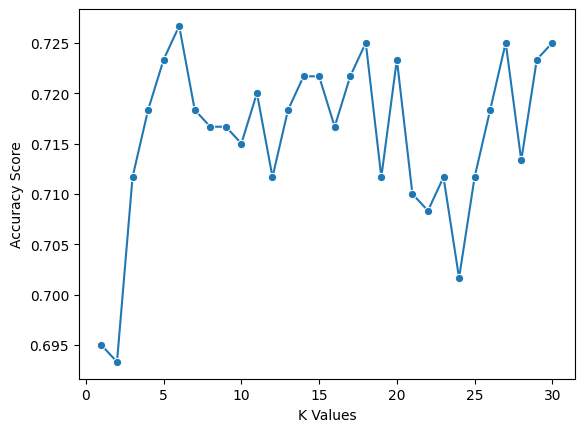

In [8]:
# Visualizing the best value for k
import seaborn as sns
from matplotlib import pyplot as plt
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

Evaluate with accuracy, precision, and recall

In [9]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [16]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.888888888888889
Precision: 0.8666666666666667


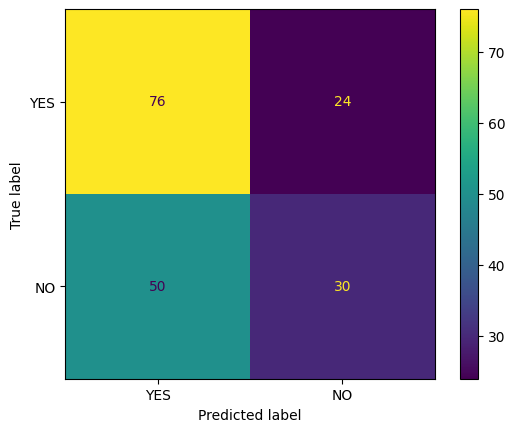

In [11]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
visualized_cm = ConfusionMatrixDisplay(cm, display_labels=["YES", "NO"]).plot()
# Note: The top left are the True Positives,
# The top right are the False Positives,
# The bottom left are the False Negatives,
# The bottom right are the True Negatives.

What I noted: 
- KNN is second ranked in terms of accuracy and precision score, it performed slightly a bit worse than decision tree

Cons:
- K-NN algorithm is very sensitive to outliers as it simply chose the neighbors based on distance criteria.
- One of the biggest issues with K-NN is to choose the optimal number of neighbors to be consider while classifying the new data entry.

Pros: 
-  K-NN can be used both for classification and regression problems.
- K-NN algorithm reads through whole dataset to find out K nearest neighbors.